In [83]:
import pandas as pd 
import collections 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns  
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import ttest_ind 
import statsmodels.api as sm 
from scipy.stats import chi2_contingency
import scipy.stats as stats 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline 
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter 
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import cohen_kappa_score 
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import pickle
from sklearn.ensemble import RandomForestClassifier


import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 5000)


In [3]:
df= pd.read_csv('anemia data from Kaggle.csv')

# Exploratory Data Analysis

We need to explore/clean/filter it before processing it for machine learning It involves adding/deleting few columns or rows, joining some other data, and handling qualitative variables like dates.


In [4]:
df.shape

(1421, 6)

In [5]:
df.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


Lets summarize the central tendency, dispersion and shape of dataset distribution

In [6]:
df.describe()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000
mean,0.520760,13.412738,22.905630,30.251232,85.523786,0.436312
std,0.499745,1.974546,3.969375,1.400898,9.636701,0.496102
min,0.000000,6.600000,16.000000,27.800000,69.400000,0.000000
25%,0.000000,11.700000,19.400000,29.000000,77.300000,0.000000
50%,1.000000,13.200000,22.700000,30.400000,85.300000,0.000000
75%,1.000000,15.000000,26.200000,31.400000,94.200000,1.000000
max,1.000000,16.900000,30.000000,32.500000,101.600000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


In [9]:
df.columns

Index(['Gender', 'Hemoglobin', 'MCH', 'MCHC', 'MCV', 'Result'], dtype='object')

In [10]:
import numpy as np
print(df.isnull().values.sum())
df = df.replace(" ",np.NaN)
print(df.isnull().values.sum())



0
0


In [11]:
df_copy = df.copy()
df_copy['Result'] = df_copy['Result'].replace({0: 'Non Anemic', 1: 'Anemic'})
df_copy['Gender'] = df_copy['Gender'].replace({0: 'Male', 1: 'Female'})
custom_colors = ['#B43757', '#a37b85']
custom_colors_gender = ['#90ADC6', '#C6A990']


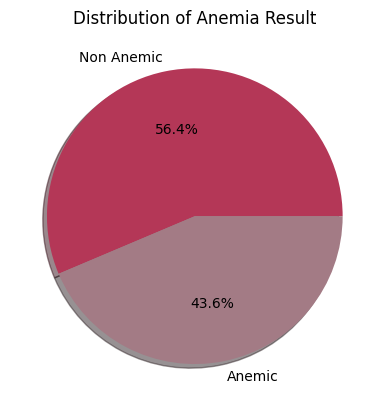

In [12]:
result_counts = df_copy['Result'].value_counts()
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', colors=custom_colors, shadow=True)
plt.title('Distribution of Anemia Result')
plt.show()

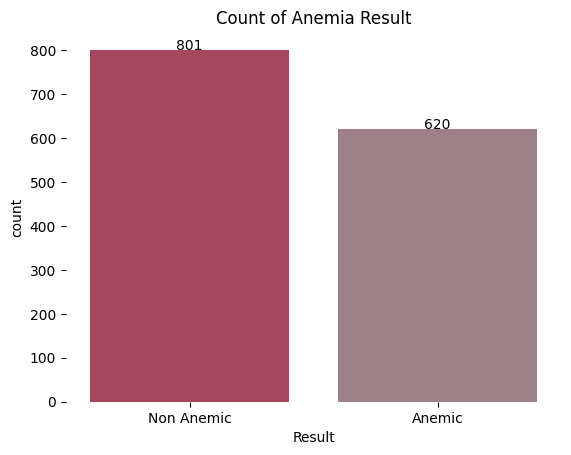

In [17]:
ax = sns.countplot(x='Result', data=df_copy, palette=custom_colors)
plt.title('Count of Anemia Result')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), '{:.0f}'.format(p.get_height()), ha='center')
sns.despine(left=True, bottom=True)
plt.show()


In [18]:
result_counts = df_copy['Result'].value_counts()
print(result_counts)
if result_counts[0] == result_counts[1]:
    print('The two categories are balanced.')
else:
    print('The two categories are not balanced.')
    
print("-----")    
print('Non Anemic', round(df['Result'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Anemic', round(df['Result'].value_counts()[1]/len(df) * 100,2), '% of the dataset')   
    

Result
Non Anemic    801
Anemic        620
Name: count, dtype: int64
The two categories are not balanced.
-----
Non Anemic 56.37 % of the dataset
Anemic 43.63 % of the dataset


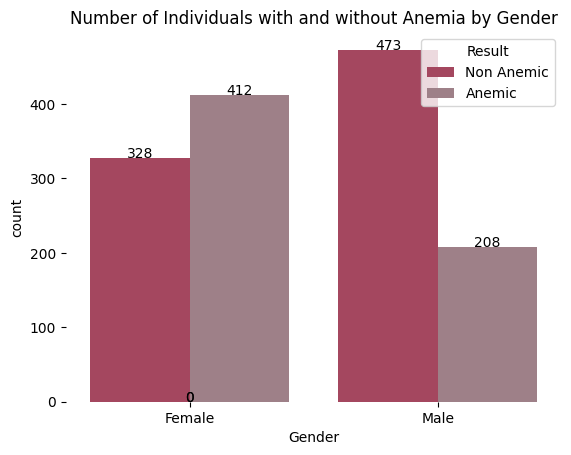

In [21]:
ax = sns.countplot(x='Gender', hue='Result', data=df_copy, palette=custom_colors)
plt.title('Number of Individuals with and without Anemia by Gender')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), '{:.0f}'.format(p.get_height()), ha='center')
sns.despine(left=True, bottom=True)
plt.show()


There are 412 Female and 208 Male with Anemic

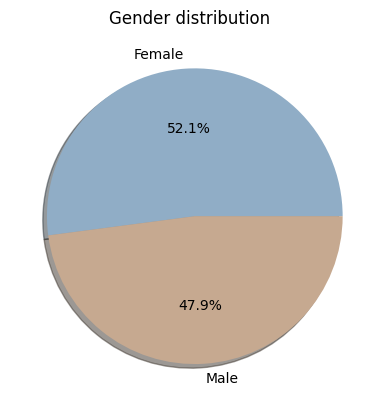

In [22]:
result_counts = df_copy['Gender'].value_counts()
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', colors=custom_colors_gender, shadow=True)
plt.title('Gender distribution  ')
plt.show()

In [23]:
df.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


In [24]:
df_copy.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,Female,14.9,22.7,29.1,83.7,Non Anemic
1,Male,15.9,25.4,28.3,72.0,Non Anemic
2,Male,9.0,21.5,29.6,71.2,Anemic
3,Male,14.9,16.0,31.4,87.5,Non Anemic
4,Female,14.7,22.0,28.2,99.5,Non Anemic


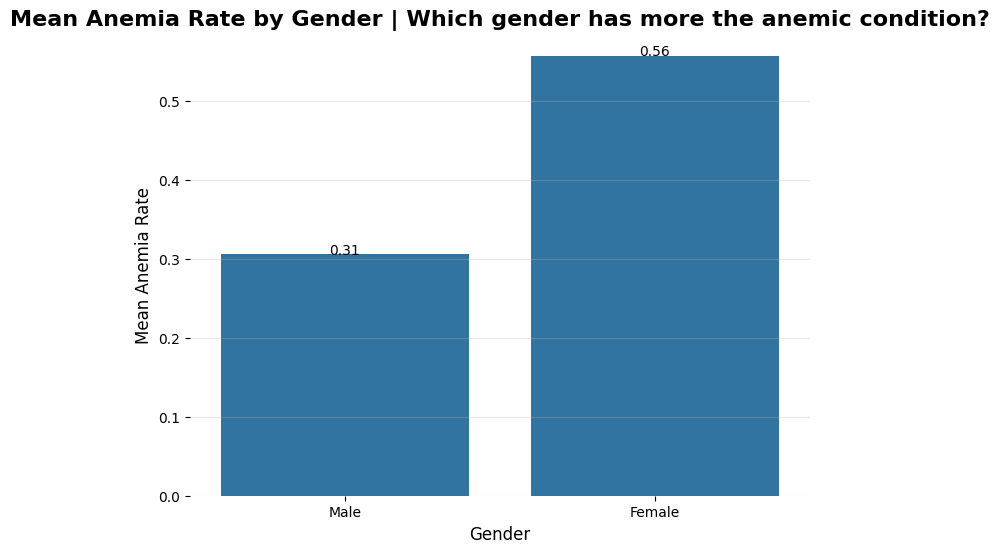

In [28]:
anemia_rates = df.groupby('Gender')['Result'].mean().reset_index()

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Gender', y='Result', data=anemia_rates)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), '{:.2f}'.format(p.get_height()), ha='center')

ax.set_xticklabels(['Male', 'Female'])
plt.title('Mean Anemia Rate by Gender | Which gender has more the anemic condition?', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Mean Anemia Rate', fontsize=12)
sns.despine(left=True, bottom=True)
plt.grid(axis='y', alpha=0.3)
plt.gca().xaxis.grid(False)
plt.show()


In [29]:
anemia_rates = df.groupby('Gender')['Result'].mean().round(2)
anemia_rates

Gender
0    0.31
1    0.56
Name: Result, dtype: float64

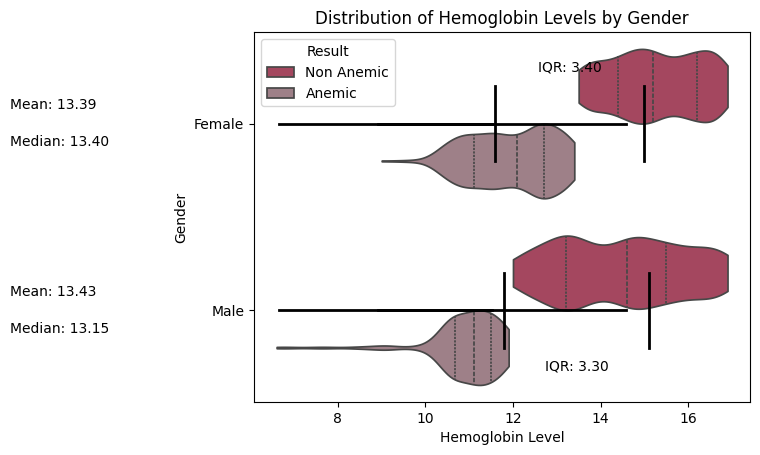

In [31]:
male_data = df_copy[df_copy['Gender'] == 'Male']
female_data = df_copy[df_copy['Gender'] == 'Female']
sns.violinplot(x='Hemoglobin', y='Gender', hue='Result', data=df_copy, palette=custom_colors, inner='quartile', scale='width', cut=0)
for i, group in enumerate([male_data, female_data]):
    median = group['Hemoglobin'].median()
    mean = group['Hemoglobin'].mean()
    plt.axhline(y=i, xmin=0.05, xmax=0.48, color='black', linewidth=2)
    plt.text(0.51, i+0.1, f'Median: {median:.2f}', ha='left', va='center')
    plt.text(0.51, i-0.1, f'Mean: {mean:.2f}', ha='left', va='center')

q1_male, q3_male = male_data['Hemoglobin'].quantile([0.25, 0.75])
q1_female, q3_female = female_data['Hemoglobin'].quantile([0.25, 0.75])
plt.axhline(y=0, xmin=0.25, xmax=0.75, color='black', linewidth=2)
plt.axhline(y=1, xmin=0.25, xmax=0.75, color='black', linewidth=2)
plt.plot([q1_male, q1_male], [-0.2, 0.2], color='black', linewidth=2)
plt.plot([q3_male, q3_male], [-0.2, 0.2], color='black', linewidth=2)
plt.plot([q1_female, q1_female], [0.8, 1.2], color='black', linewidth=2)
plt.plot([q3_female, q3_female], [0.8, 1.2], color='black', linewidth=2)
plt.text((q1_male+q3_male)/2, -0.3, f'IQR: {q3_male-q1_male:.2f}', ha='center', va='center')
plt.text((q1_female+q3_female)/2, 1.3, f'IQR: {q3_female-q1_female:.2f}', ha='center', va='center')
plt.title('Distribution of Hemoglobin Levels by Gender')
plt.xlabel('Hemoglobin Level')
plt.ylabel('Gender')
plt.show()


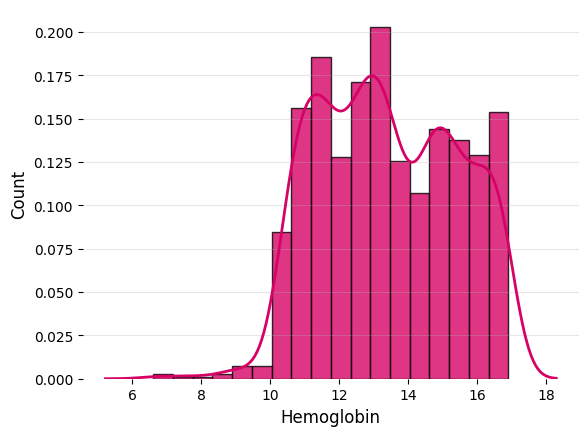

<Figure size 800x600 with 0 Axes>

In [33]:
iqr = np.percentile(df['Hemoglobin'], 75) - np.percentile(df['Hemoglobin'], 25)
bin_width = 2 * iqr / (len(df)**(1/3))
sns.distplot(df['Hemoglobin'], hist=True, kde=True, 
             bins=int(round((df['Hemoglobin'].max() - df['Hemoglobin'].min()) / bin_width)),
             color='#d60266',
             hist_kws={'edgecolor':'black', 'alpha': 0.8},
             kde_kws={'linewidth': 2})
plt.xlabel('Hemoglobin', fontsize=12)
plt.ylabel('Count', fontsize=12)
sns.despine(left=True, bottom=True)
plt.grid(axis='y', alpha=0.3)
plt.gca().xaxis.grid(False)
plt.figure(figsize=(8, 6))
plt.show()




In [35]:
skewness = stats.skew(df['Hemoglobin'])
kurtosis = stats.kurtosis(df['Hemoglobin'], fisher=False)
print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

Skewness: 0.022721507912660675
Kurtosis: 2.1042580924983616


Presence of slightly negative skewness

In [36]:
hemoglobin_data = {'Metric': ['Highest Hemoglobin Level', 'Average Hemoglobin Level', 'Lowest Hemoglobin Level'],
                   'Value': [df['Hemoglobin'].max(), df['Hemoglobin'].mean(), df['Hemoglobin'].min()]}
hemoglobin_table = pd.DataFrame(hemoglobin_data)
styled_table = (hemoglobin_table.style
                .set_caption('Hemoglobin Levels')
                .set_properties(**{'text-align': 'center'})
                .set_table_styles([{'selector': 'caption',
                                    'props': [('font-size', '18px'),
                                              ('font-weight', 'bold'),
                                              ('padding-bottom', '10px')]}])
                
                .format({'Value': '{:.2f}'}))
display(styled_table)


,Metric,Value
0,Highest Hemoglobin Level,16.90
1,Average Hemoglobin Level,13.41
2,Lowest Hemoglobin Level,6.60


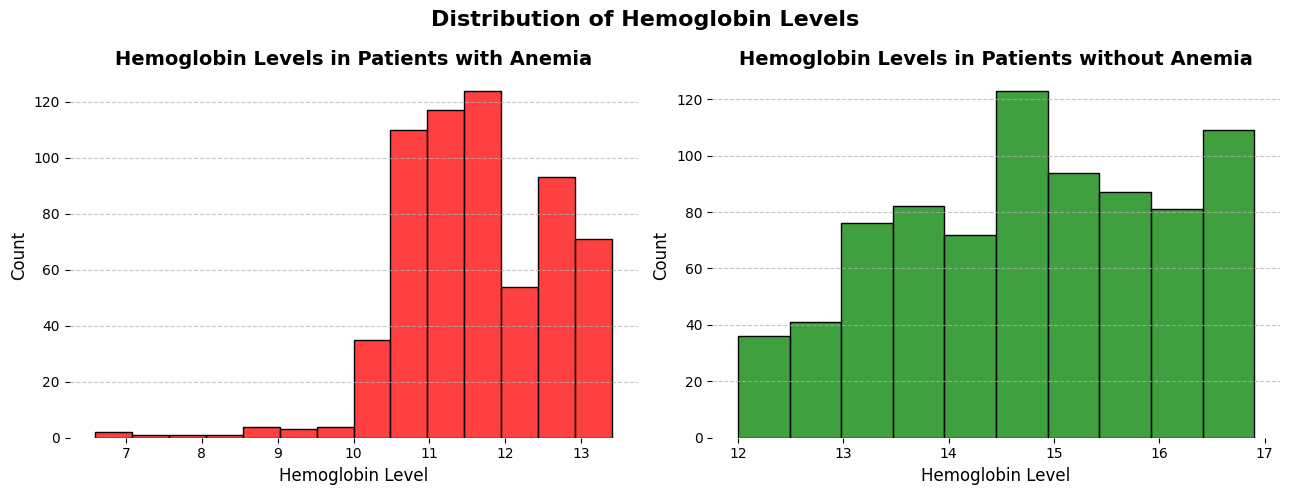

In [38]:
anemia_data = df[df['Result'] == 1]
no_anemia_data = df[df['Result'] == 0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,5))

sns.histplot(anemia_data, x='Hemoglobin', ax=ax1, color='red',  binwidth=0.5)
sns.histplot(no_anemia_data, x='Hemoglobin', ax=ax2, color='green',  binwidth=0.5)

ax1.set_title('Hemoglobin Levels in Patients with Anemia', fontsize=14, fontweight='bold')
ax2.set_title('Hemoglobin Levels in Patients without Anemia', fontsize=14, fontweight='bold')
fig.suptitle('Distribution of Hemoglobin Levels', fontsize=16, fontweight='bold')
ax1.set_xlabel('Hemoglobin Level', fontsize=12)
ax2.set_xlabel('Hemoglobin Level', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax2.set_ylabel('Count', fontsize=12)

ax1.tick_params(labelsize=10)
ax2.tick_params(labelsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


In [39]:
MCH_data = {'Metric': ['Highest MCH Level', 'Average MCH Level', 'Lowest MCH Level'],
                   'Value': [df['MCH'].max(), df['MCH'].mean(), df['MCH'].min()]}

MCH_table = pd.DataFrame(MCH_data)

styled_table = (MCH_table.style
                .set_caption('MCH Levels')
                .set_properties(**{'text-align': 'center'})
                .set_table_styles([{'selector': 'caption',
                                    'props': [('font-size', '18px'),
                                              ('font-weight', 'bold'),
                                              ('padding-bottom', '10px')]}])
                
                .format({'Value': '{:.2f}'}))

display(styled_table)

,Metric,Value
0,Highest MCH Level,30.00
1,Average MCH Level,22.91
2,Lowest MCH Level,16.00


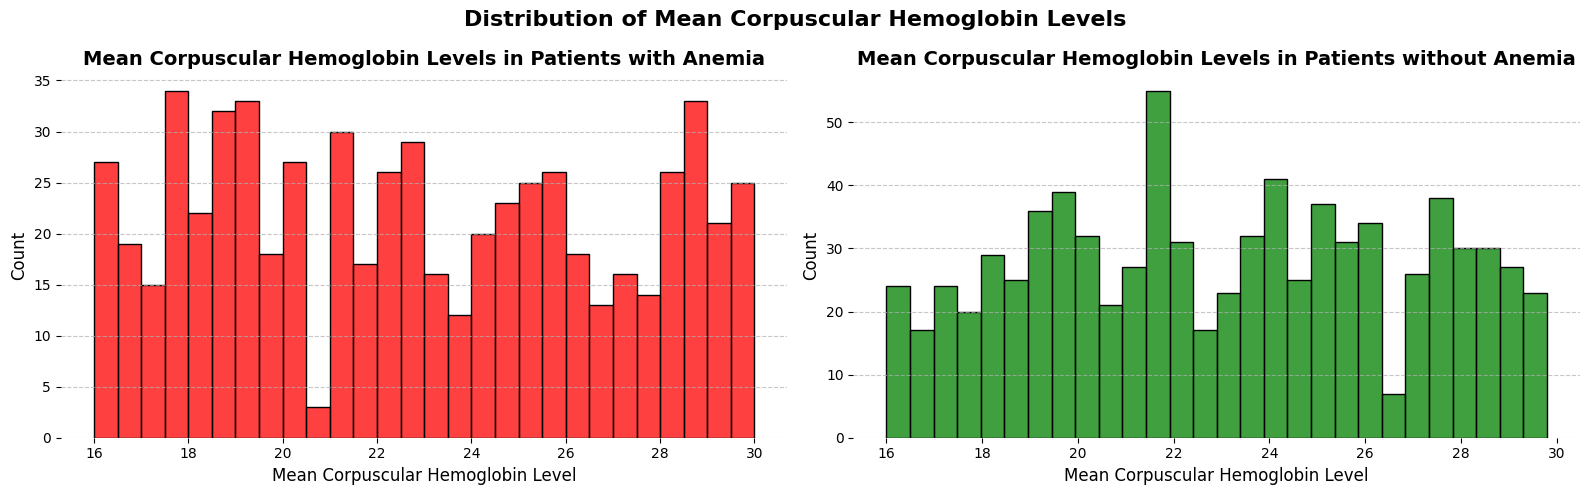

In [40]:
anemia_data = df[df['Result'] == 1]
no_anemia_data = df[df['Result'] == 0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
sns.histplot(anemia_data, x='MCH', ax=ax1, color='red',  binwidth=0.5)
sns.histplot(no_anemia_data, x='MCH', ax=ax2, color='green',  binwidth=0.5)

ax1.set_title('Mean Corpuscular Hemoglobin Levels in Patients with Anemia', fontsize=14, fontweight='bold')
ax2.set_title('Mean Corpuscular Hemoglobin Levels in Patients without Anemia', fontsize=14, fontweight='bold')
fig.suptitle('Distribution of Mean Corpuscular Hemoglobin Levels', fontsize=16, fontweight='bold')
ax1.set_xlabel('Mean Corpuscular Hemoglobin Level', fontsize=12)
ax2.set_xlabel('Mean Corpuscular Hemoglobin Level', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax2.set_ylabel('Count', fontsize=12)

ax1.tick_params(labelsize=10)
ax2.tick_params(labelsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

sns.despine(left=True, bottom=True)

plt.tight_layout()

plt.show()

In [42]:
MCHC_data = {'Metric': ['Highest MCHC Level', 'Average MCHC Level', 'Lowest MCHC Level'],
                   'Value': [df['MCHC'].max(), df['MCHC'].mean(), df['MCHC'].min()]}

MCHC_table = pd.DataFrame(MCHC_data)

styled_table = (MCHC_table.style
                .set_caption('MCHC Levels')
                .set_properties(**{'text-align': 'center'})
                .set_table_styles([{'selector': 'caption',
                                    'props': [('font-size', '18px'),
                                              ('font-weight', 'bold'),
                                              ('padding-bottom', '10px')]}])
                
                .format({'Value': '{:.2f}'}))

display(styled_table)

,Metric,Value
0,Highest MCHC Level,32.50
1,Average MCHC Level,30.25
2,Lowest MCHC Level,27.80


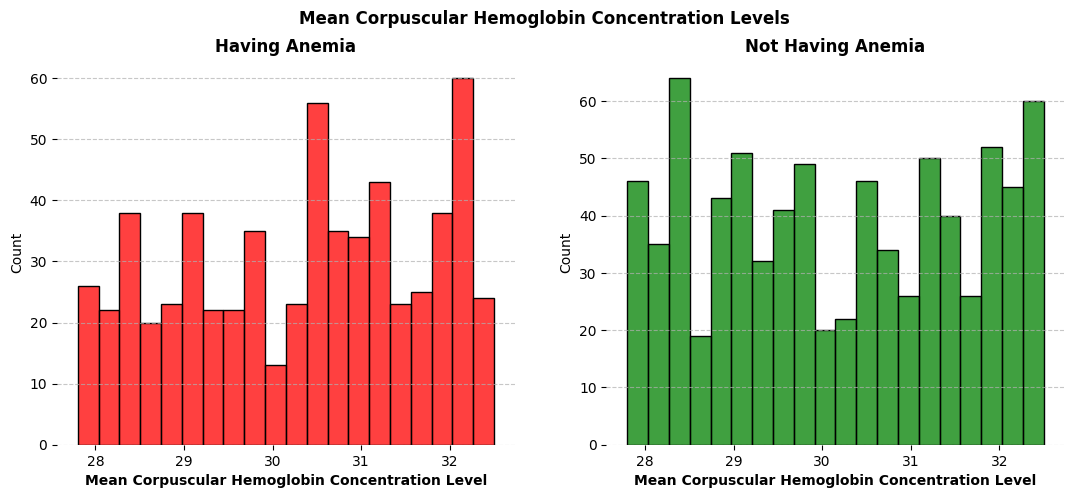

In [44]:
anemia_data = df[df['Result']==1]
no_anemia_data = df[df['Result']==0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,5))

sns.histplot(anemia_data, x='MCHC', ax=ax1, color='red', bins=20)
sns.histplot(no_anemia_data, x='MCHC', ax=ax2, color='green', bins=20)

ax1.tick_params(labelsize=10)
ax2.tick_params(labelsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

ax1.set_title('Having Anemia', fontweight='bold')
ax2.set_title('Not Having Anemia', fontweight='bold')
fig.suptitle('Mean Corpuscular Hemoglobin Concentration Levels', fontweight='bold')
ax1.set_xlabel('Mean Corpuscular Hemoglobin Concentration Level', fontweight='bold')
ax2.set_xlabel('Mean Corpuscular Hemoglobin Concentration Level', fontweight='bold')
ax1.set_ylabel('Count')
ax2.set_ylabel('Count')

sns.despine(left=True, bottom=True)

plt.show()


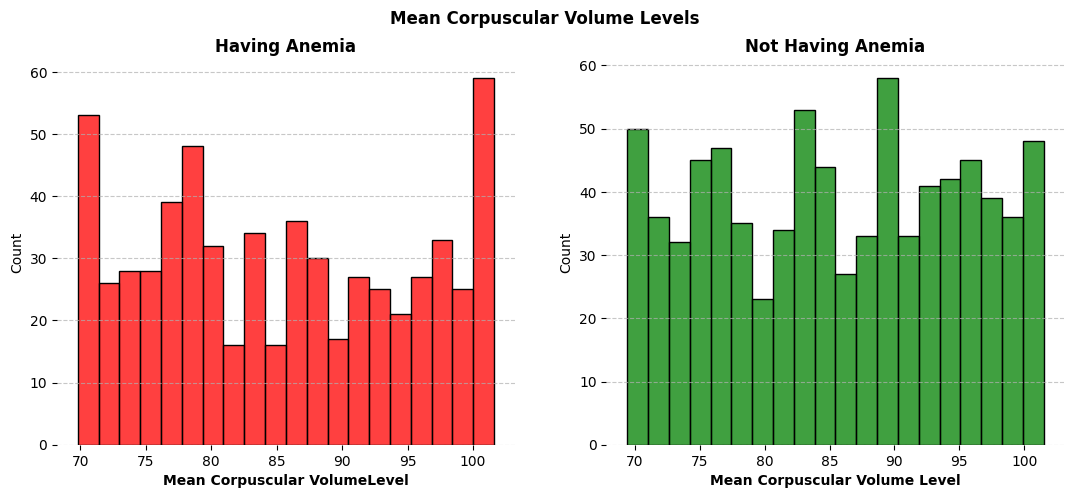

In [45]:
anemia_data = df[df['Result']==1]
no_anemia_data = df[df['Result']==0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,5))

sns.histplot(anemia_data, x='MCV', ax=ax1, color='red', bins=20)
sns.histplot(no_anemia_data, x='MCV', ax=ax2, color='green', bins=20)

ax1.tick_params(labelsize=10)
ax2.tick_params(labelsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

ax1.set_title('Having Anemia', fontweight='bold')
ax2.set_title('Not Having Anemia',fontweight='bold' )
fig.suptitle('Mean Corpuscular Volume Levels',fontweight='bold')
ax1.set_xlabel('Mean Corpuscular VolumeLevel',fontweight='bold')
ax2.set_xlabel('Mean Corpuscular Volume Level',fontweight='bold')
ax1.set_ylabel('Count')
ax2.set_ylabel('Count')

sns.despine(left=True, bottom=True)

plt.show()

In [46]:
MCV_data = {'Metric': ['Highest MCV Level', 'Average MCV Level', 'Lowest MCV Level'],
                   'Value': [df['MCV'].max(), df['MCV'].mean(), df['MCV'].min()]}

MCV_table = pd.DataFrame(MCV_data)

styled_table = (MCV_table.style
                .set_caption('MCV Levels')
                .set_properties(**{'text-align': 'center'})
                .set_table_styles([{'selector': 'caption',
                                    'props': [('font-size', '18px'),
                                              ('font-weight', 'bold'),
                                              ('padding-bottom', '10px')]}])
                
                .format({'Value': '{:.2f}'}))
display(styled_table)

,Metric,Value
0,Highest MCV Level,101.60
1,Average MCV Level,85.52
2,Lowest MCV Level,69.40


In [48]:
blood_data = {'Metric': ['Highest MCHC Level', 'Average MCHC Level', 'Lowest MCHC Level',
                         'Highest MCV Level', 'Average MCV Level', 'Lowest MCV Level',
                         'Highest MCH Level', 'Average MCH Level', 'Lowest MCH Level',
                         'Highest Hemoglobin Level', 'Average Hemoglobin Level', 'Lowest Hemoglobin Level'],
              'Value': [df['MCHC'].max(), df['MCHC'].mean(), df['MCHC'].min(),
                        df['MCV'].max(), df['MCV'].mean(), df['MCV'].min(),
                        df['MCH'].max(), df['MCH'].mean(), df['MCH'].min(),
                        df['Hemoglobin'].max(), df['Hemoglobin'].mean(), df['Hemoglobin'].min()]}

blood_table = pd.DataFrame(blood_data)

styled_table = (blood_table.style
                .set_caption('Blood Test Results')
                .set_properties(**{'text-align': 'center'})
                .set_table_styles([{'selector': 'caption',                                    'props': [('font-size', '18px'),                                              ('font-weight', 'bold'),                                              ('padding-bottom', '10px')]}])
                
                .format({'Value': '{:.2f}'}))

display(styled_table)


,Metric,Value
0,Highest MCHC Level,32.50
1,Average MCHC Level,30.25
2,Lowest MCHC Level,27.80
3,Highest MCV Level,101.60
4,Average MCV Level,85.52
5,Lowest MCV Level,69.40
6,Highest MCH Level,30.00
7,Average MCH Level,22.91
8,Lowest MCH Level,16.00
9,Highest Hemoglobin Level,16.90


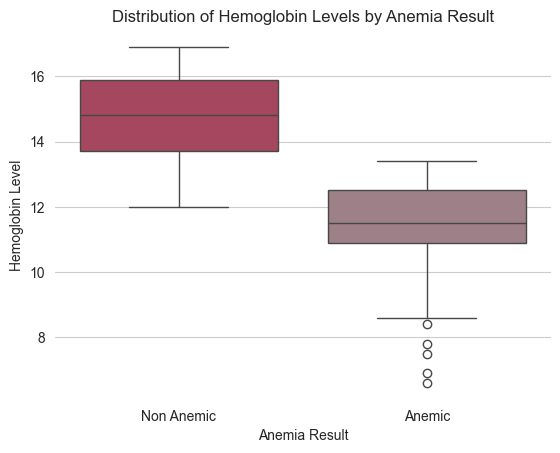

In [49]:
sns.set_style("whitegrid")
sns.boxplot(x='Result', y='Hemoglobin', data=df_copy, palette=custom_colors)
plt.title('Distribution of Hemoglobin Levels by Anemia Result')
plt.xlabel('Anemia Result')
plt.ylabel('Hemoglobin Level')

sns.despine(left=True, bottom=True)
plt.show()


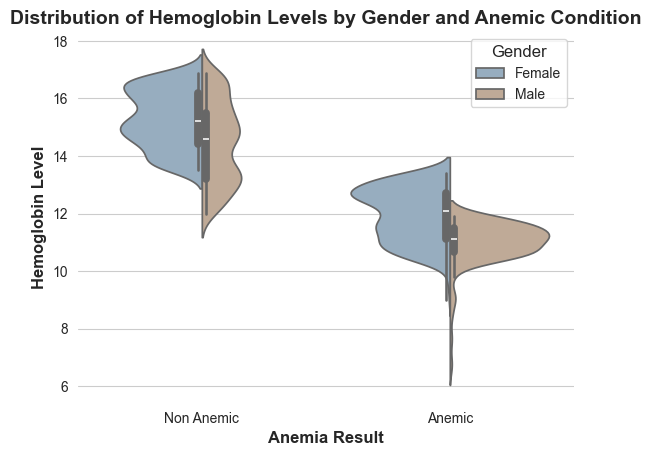

In [51]:
ax = sns.violinplot(x='Result', y='Hemoglobin', hue='Gender', data=df_copy, palette=custom_colors_gender, split=True)

ax.set_title('Distribution of Hemoglobin Levels by Gender and Anemic Condition', fontsize=14, fontweight='bold')
ax.set_xlabel('Anemia Result', fontsize=12, fontweight='bold')
ax.set_ylabel('Hemoglobin Level', fontsize=12, fontweight='bold')

ax.legend(title='Gender', title_fontsize=12, fontsize=10, loc='upper right')

sns.despine(left=True, bottom=True)

plt.show()


In [52]:
df[['Gender','Hemoglobin','Result', 'MCH', 'MCV', 'MCHC']].corr()['Result'].sort_values(ascending=False).head(10)

Result        1.000000
Gender        0.253169
MCHC          0.048067
MCV          -0.020571
MCH          -0.028678
Hemoglobin   -0.796261
Name: Result, dtype: float64

----------

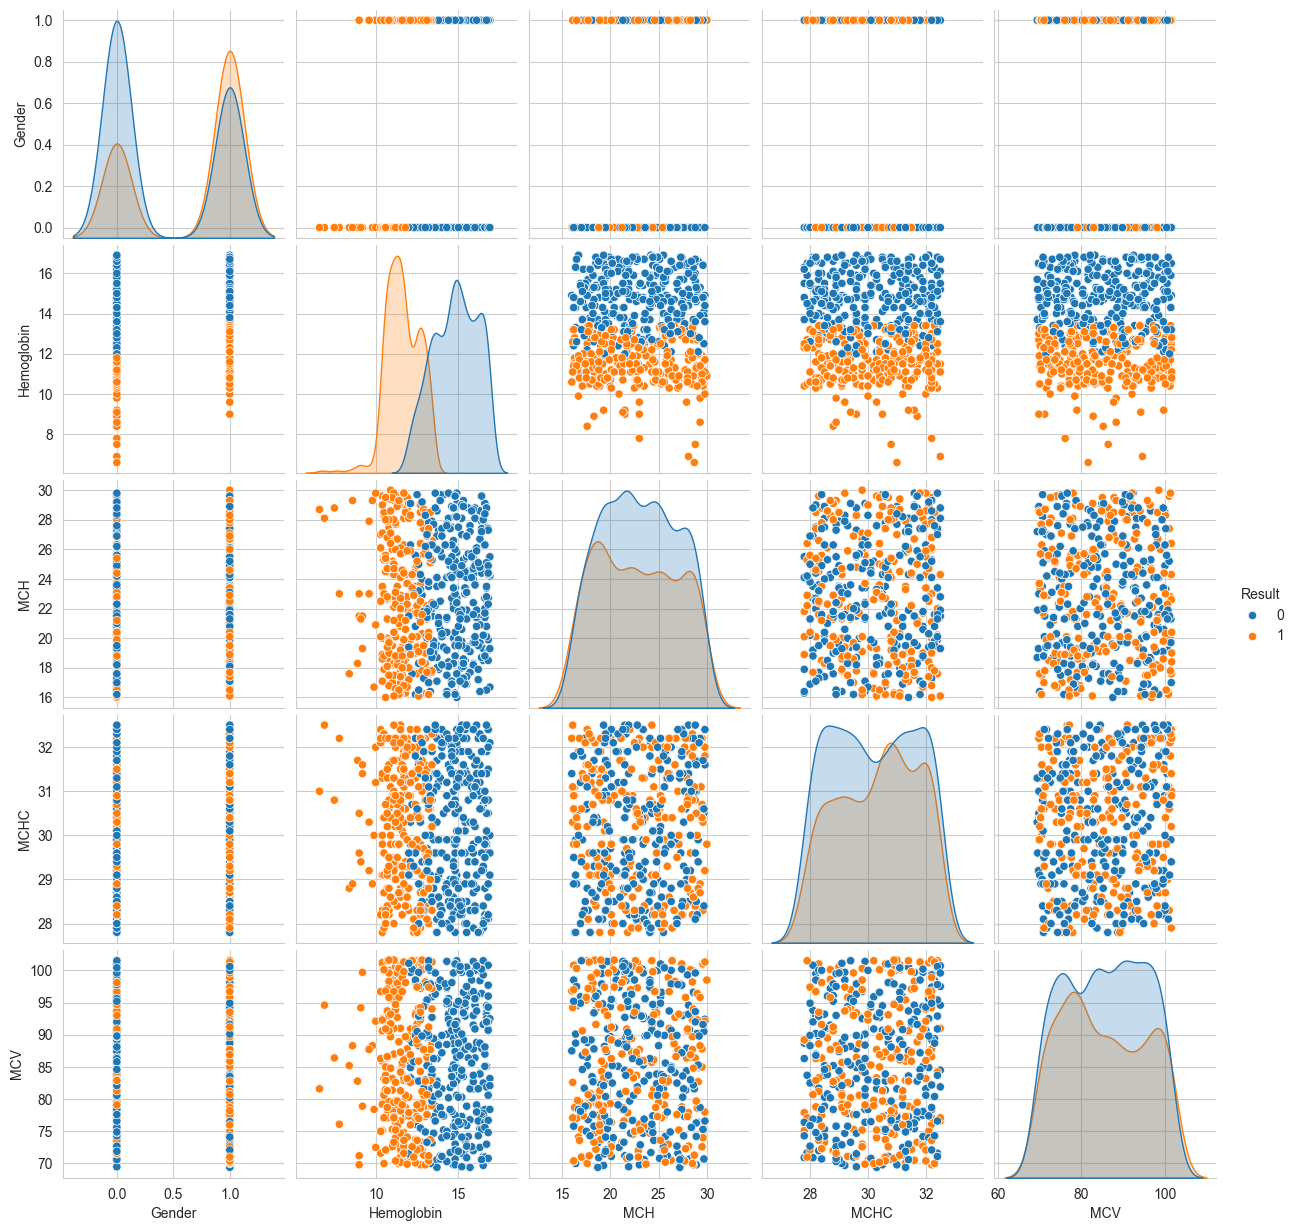

In [53]:
sns.pairplot(df,hue='Result')

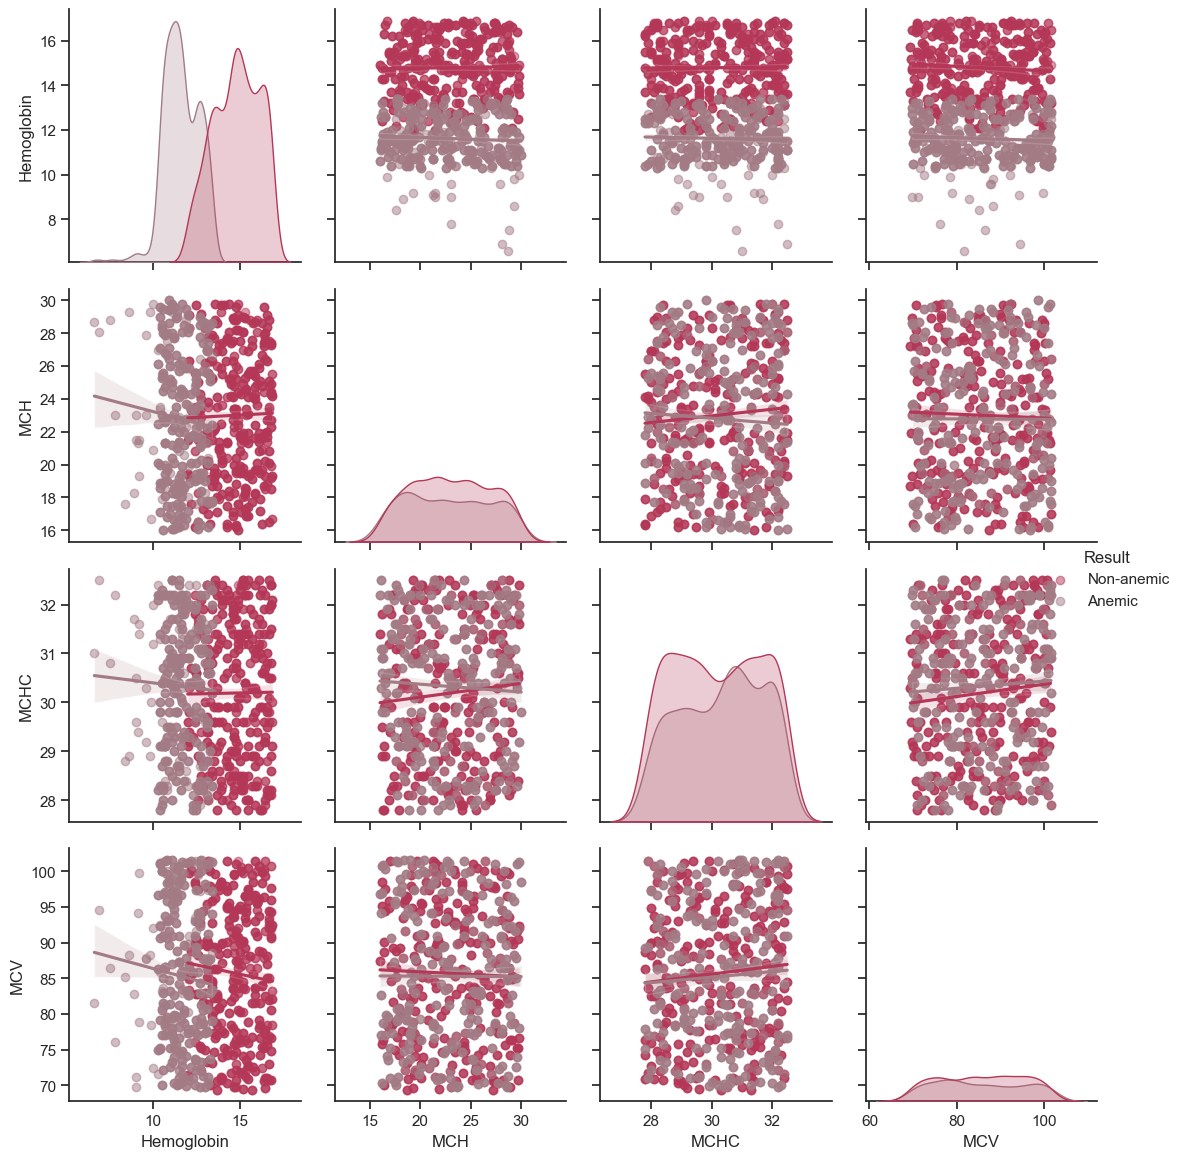

In [54]:
sns.set(style="ticks")

RELATIONS_COLS = ["Hemoglobin", "MCH", "MCHC","MCV"]

g = sns.PairGrid(data=df, vars=RELATIONS_COLS, hue="Result", palette=custom_colors)
g.map_diag(sns.kdeplot, shade=True)
g.map_offdiag(sns.regplot, scatter_kws={'alpha':0.5})
g.add_legend(title="Result")
legend = g._legend

g.fig.set_size_inches(12, 12)

new_labels = ['Non-anemic', 'Anemic']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)


---

In [55]:
df_stat = df.copy()
df_stat.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


In [56]:
male_hemoglobin = df_stat.loc[df_stat['Gender'] == 0, 'Hemoglobin']
female_hemoglobin = df_stat.loc[df_stat['Gender'] == 1, 'Hemoglobin']

t_statistic, p_value = ttest_ind(male_hemoglobin, female_hemoglobin)

print("T-Statistic: {:.2f}".format(t_statistic))
print("P-Value: {:.3f}".format(p_value))

if p_value < 0.05:
    print("Reject null hypothesis: Gender has an impact on hemoglobin levels.")
else:
    print("Fail to reject null hypothesis: Gender has no impact on hemoglobin levels.")


T-Statistic: -0.41
P-Value: 0.679
Fail to reject null hypothesis: Gender has no impact on hemoglobin levels.


In [57]:
df_stat['is_female'] = np.where(df_stat['Gender'] == 1, 1, 0)
df_stat['is_anemic'] = np.where(df_stat['Result'] == 1, 1, 0)

logit_model = sm.Logit(df_stat['is_anemic'], sm.add_constant(df_stat['is_female']))
result = logit_model.fit()

print("Odds Ratio for Gender: {:.2f}".format(np.exp(result.params[1])))

Optimization terminated successfully.
         Current function value: 0.652524
         Iterations 5
Odds Ratio for Gender: 2.86


In [63]:
cont_table = pd.crosstab(df_stat['Gender'], df_stat['Result'])

chi2_statistic, p_value, dof, expected = chi2_contingency(cont_table)

print("Chi-Square Statistic: {:.2f}".format(chi2_statistic))
print("P-Value: {:.3f}".format(p_value))

if p_value < 0.05:
    print("Reject null hypothesis: Gender and anemia status are dependent.")
else:
    print("Fail to reject null hypothesis: Gender and anemia status are independent.")


Chi-Square Statistic: 90.06
P-Value: 0.000
Reject null hypothesis: Gender and anemia status are dependent.


## Correlation
 Pearson correlation matrixis is used.


In [59]:
df[['Gender','Hemoglobin','Result', 'MCH', 'MCV', 'MCHC']].corr()['Result'].sort_values(ascending=False).head(10)

Result        1.000000
Gender        0.253169
MCHC          0.048067
MCV          -0.020571
MCH          -0.028678
Hemoglobin   -0.796261
Name: Result, dtype: float64

Here if we see, MCV, MCG and Hemoglobin have negative correlation with Result column

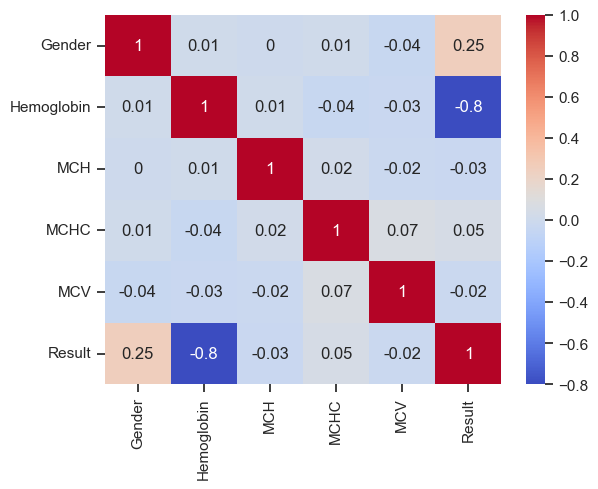

In [60]:
corr_matrix = df.corr().round(2)
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()


In [64]:
X = df.iloc[:,0:5] 
y = df.iloc[:,5] 

k_values = [2, 3, 4, 5]  
best_k = 0  
best_score = 0 

for k in k_values:
    bestfeatures = SelectKBest(score_func=chi2, k=k)
    fit = bestfeatures.fit(X, y)

    dfscores = pd.DataFrame(fit.scores_) 
    dfcolumns = pd.DataFrame(X.columns)

    featureScores = pd.concat([dfcolumns, dfscores], axis=1)
    featureScores.columns = ['Specs','Score']  

    if featureScores['Score'].sum() > best_score:
        best_score = featureScores['Score'].sum()
        best_k = k

print(f"The best value of K is {best_k} with score {best_score}.")

print("---")
print(featureScores)
print("---")
print(featureScores.nlargest(3,'Score')) 

The best value of K is 2 with score 307.0244798773891.
---
        Specs       Score
0      Gender   43.648385
1  Hemoglobin  261.707512
2         MCH    0.803292
3        MCHC    0.212839
4         MCV    0.652452
---
        Specs       Score
1  Hemoglobin  261.707512
0      Gender   43.648385
2         MCH    0.803292


# Extremely Randomized Trees.

In [65]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [66]:
print(model.feature_importances_)

[0.07915599 0.74265186 0.06178854 0.05446268 0.06194093]


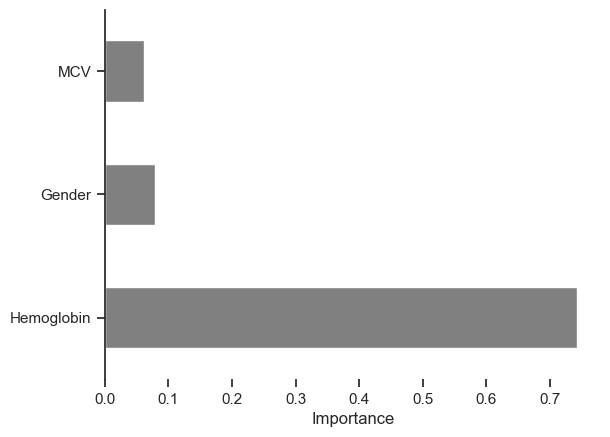

<Figure size 640x480 with 0 Axes>

In [67]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

feat_importances.nlargest(3).plot(kind='barh', color='#808080')
plt.xlabel('Importance')
sns.despine(left=False, bottom=True)
plt.show()
plt.savefig('Top2Feature.jpg')

In [68]:
df['Hemoglobin_log'] = np.log(df.Hemoglobin + 0.01)

In [71]:
ss = StandardScaler()
df['Hemoglobin_scaled'] = ss.fit_transform(df['Hemoglobin'].values.reshape(-1,1))

In [72]:
mm = MinMaxScaler()
df['Hemoglobin_minmax'] = mm.fit_transform(df['Hemoglobin'].values.reshape(-1,1))

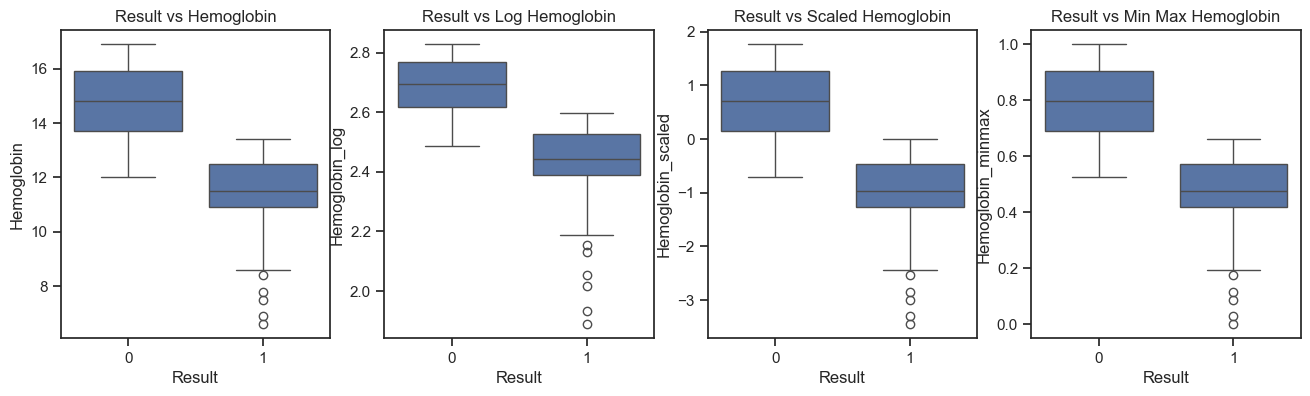

In [74]:
fig , axs = plt.subplots(nrows = 1 , ncols = 4 , figsize = (16,4))

sns.boxplot(x ="Result",y="Hemoglobin",data=df, ax = axs[0])
axs[0].set_title("Result vs Hemoglobin")

sns.boxplot(x ="Result",y="Hemoglobin_log",data=df, ax = axs[1])
axs[1].set_title("Result vs Log Hemoglobin")

sns.boxplot(x ="Result",y="Hemoglobin_scaled",data=df, ax = axs[2])
axs[2].set_title("Result vs Scaled Hemoglobin")

sns.boxplot(x ="Result",y="Hemoglobin_minmax",data=df, ax = axs[3])
axs[3].set_title("Result vs Min Max Hemoglobin")

plt.show()

In [75]:
df.columns

Index(['Gender', 'Hemoglobin', 'MCH', 'MCHC', 'MCV', 'Result',
       'Hemoglobin_log', 'Hemoglobin_scaled', 'Hemoglobin_minmax'],
      dtype='object')

In [76]:
X = df.drop(['MCHC','Hemoglobin_log', 'Hemoglobin_scaled', 'Hemoglobin_minmax', 'Result', 'MCH'],axis=1)
y = df['Result']

In [77]:
X


,Gender,Hemoglobin,MCV
0,1,14.9,83.7
1,0,15.9,72.0
2,0,9.0,71.2
3,0,14.9,87.5
4,1,14.7,99.5
...,...,...,...
1416,0,10.6,82.9
1417,1,12.1,86.9
1418,1,13.1,80.7
1419,0,14.3,95.2


In [78]:
y

0       0
1       0
2       1
3       0
4       0
       ..
1416    1
1417    1
1418    1
1419    0
1420    1
Name: Result, Length: 1421, dtype: int64

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=101)

In [80]:
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (994, 3)
y_train -  (994,)
X_test -  (427, 3)
y_test -  (427,)


In [82]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

print(metrics.classification_report(y_test, y_pred))
print('Accuracy: {0:0.5f}'.format(metrics.accuracy_score(y_test, y_pred)))
print('AUC: {0:0.5f}'.format(metrics.roc_auc_score(y_test, y_pred)))
print('Precision: {0:0.5f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: {0:0.5f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1: {0:0.5f}'.format(metrics.f1_score(y_test, y_pred)))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       246
           1       1.00      1.00      1.00       181

    accuracy                           1.00       427
   macro avg       1.00      1.00      1.00       427
weighted avg       1.00      1.00      1.00       427

Accuracy: 1.00000
AUC: 1.00000
Precision: 1.00000
Recall: 1.00000
F1: 1.00000


In [84]:
filename = 'random_forest_model.pkl'
pickle.dump(random_forest, open(filename, 'wb'))

print("Random Forest model exported as pickle file:", filename)


Random Forest model exported as pickle file: random_forest_model.pkl
